# 컴퓨터 비전 소개


문서의 위아래로 탐색하려면 키보드의 방향키 키를 사용할 수 있습니다.<br />
이 노트북의 코드를 실행하려면 코드 블록을 선택하고 **Shift+Enter**를 누르십시오. <br />
코드 블록을 편집하려면 Enter 키를 누릅니다.

#### 노트북의 코드는 누적되어 사용됩니다.(정의된 변수는 노트북이 닫힐 때까지 계속 사용 가능) <br />
따라서 실행 순서를 위에서부터 아래로 진행하세요. 과정을 뛰어넘어 진행한다면 에러가 발생할 수 있습니다!


쥬피터 노트북 사용에 대한 추가 도움말을 보려면 위의 메뉴에서 도움말(Help) > 사용자 인터페이스 둘러보기(User Interface Tour)를 클릭하세요. <br />
또는 다음 사이트를 방문하여 살펴보세요. https://jupyter-notebook.readthedocs.io/en/stable/ui_components.html

여러분의 아이디어를 실험하고 테스트해보세요. 그것이 학습에 있어서 가장 빠른 방법 중 하나이기 때문입니다!

## 1. 컴퓨터는 어떻게 볼수 있을까요?

중고등 학생들은 학교의 모든 학생들을 알고 지낼수는 없지만 거리에서 교복을 입은 모습을 보고 같은 학교 학생이라고 구별할 수 있습니다. 학생들은 보기 위해 눈을 사용했고, 뇌는 그 정보를 처리했습니다.

컴퓨터가 비슷한 일을 하도록 할 수 있습니까?
<br />
어디서 부터 시작할 수 있을까요?

우리가 같은 학교 학생을 구별해 내는 2 단계와 동일하게 처리할 수 있습니다.<br />
1) 눈으로 보기<br />
2) 우리가 보는 것을 이해하기(거리에서 학생들이 입은 교복이 우리학교 교복이라는 것을 인식)

### 코드 시작하기

이 세션에서는 Python 및 OpenCV용 인텔® 배포판을 사용합니다.

또 다른 유용한 Python 라이브러리는 배열/행렬을 빠르게 처리할 수 있는른 Numpy 라이브러리입니다. 
이미지는 실제로 픽셀의 배열/행렬로 구성되므로 Numpy 라이브러리를 사용하여 더 빠르게 이미지 처리를 수행할 수 있습니다.

Python 및 Numpy에 대한 사용 경험이 없는 경우<br />
https://www.datacamp.com/courses/intro-to-python-for-data-science 에서 더 많은 정보를 확인하실 수 있습니다.

아래 코드 블록을 실행하려면 블록을 선택하고 **Shift+Enter**를 누르십시오. <br />
실행 결과는 코드 블록 바로 아래에 출력됩니다. 첫 코드 블록은 여러분의 컴퓨터에 설치된 OpenCV 및 Python 버전을 표시합니다.

### 라이브러리 가져오기

In [7]:
import cv2              # OpenCV 라이브러리 가져오기
import numpy as np      # Numpy 라이브러리 가져오기
import sys

print ("You have successfully installed OpenCV version "+cv2.__version__) 
print ("Your version of Python is " + sys.version)

You have successfully installed OpenCV version 4.9.0
Your version of Python is 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


### 1.1 보기. 첫번째 사진을 화면에 표시해 봅시다!

In [8]:
img = cv2.imread("[Dataset] Module 20 images/image001.png")   # 이미지 파일을 메모리에 읽기
cv2.imshow("Image", img)                  # 해당 이미지 표시

cv2.waitKey(0)                            # 아무키나 누르면 이미지 표시창이 종료됩니다.
cv2.destroyAllWindows()

#### 위의 코드 블록을 실행한 후 창에서 이미지가 생성되었는지 확인하세요!

이 이미지의 크기를 확인해 봅시다!

In [9]:
print (img[:,:,2].shape)

(600, 800)


잘하셨습니다! 여러분은 OpenCV를 사용하여 이미지를 읽고 새로운 창에 표시해 보았습니다.

다른 라이브러리를 사용하여 새로운 창이 아닌 노트북에 이미지를 표시할 수 있습니다.

여러분이 code를 편집하여 이미지를 노트북에 표시해 보세요.

### 작업 1: matplotlib 라이브러리를 가져오고 이 노트북에 이미지를 표시합니다.

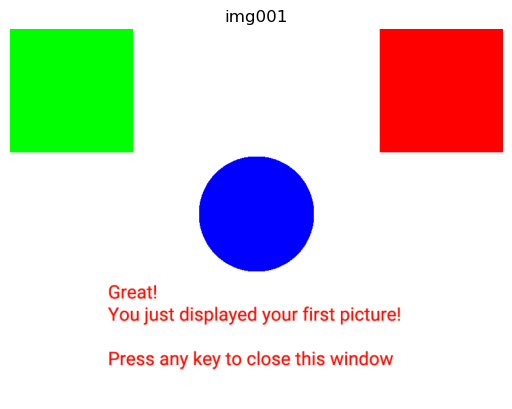

In [10]:
import matplotlib.pyplot as plt

#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

from PIL import Image  #Python Image Library
import requests # 외부 URL
from io import BytesIO

img_1 = cv2.imread("[Dataset] Module 20 images/image001.png")

plt.imshow(img_1)
plt.title('img001')
plt.axis('off')
plt.show()

표시한 이미지의 색상이 올바른지 확인해 보세요. 그렇지 않다면 색 공간을 변경해서 다시 표시해야 합니다.

이 단계에서 컴퓨터가 이미지의 내용을 이해하고 있습니까?

### 1.1b 사진 대신 웹캠을 사용해 봅시다.

In [11]:
camera = cv2.VideoCapture(0) #' 첫 번째' 카메라(웹캠)로 VideoCapture 객체 생성

while(True):
    ret, frame = camera.read()                              # 프레임 단위로 캡처
    cv2.imshow('Press Spacebar to Exit',frame)              # 프레임 표시
    
    if cv2.waitKey(1) & 0xFF == ord(' '):  # 스페이스바가 감지되면 중지
        break

camera.release()                           # 스페이스바가 감지된 후 창을 종료
cv2.destroyAllWindows()

축하합니다! 새로운 창에서 여러분의 얼굴을 보았습니까?

### 1.2 보는 것을 이해하기

눈이 보는 것과 같이 컴퓨터가 볼 수 있도록 하는 방법을 학습하였습니다. 이제 컴퓨터는 보이는 것을 이해해야 합니다.

이전 노트북에서 Numpy 라이브러리를 사용해 보았습니다. OpenCV 라이브러리를 사용하면 이미지를 Numpy Array로 저장합니다.

기본적으로 이미지를 빠르게 분석하는 데 사용할 수 있는 메서드가 내장되어 있습니다.<br />
예를 들어 **.shape**는 저장된 이미지의 Numpy 배열 크기(높이, 너비, 채널)를 알려줍니다.<br />
이 외에도 배열을 다룰 수 있는 다양한 고급 기술이 있지만 우선은 간단한 메서드만 사용하겠습니다.

이미지는 기본적으로 R(빨간색), G(녹색), B(파란색)의 3개 채널로 구성되어 있으며, 각 채널별 픽셀 강도를 갖고 있습니다. 
이것은 OpenCV에서 사용하는 기본 색 공간입니다.

- image001.png 이미지의 크기를 확인해 보세요.
- 이미지의 여러 부분에 색상을 확인해 보세요.
- 이미지의 색상 강도를 표현하는 방법을 확인해 보세요.

<img src="[Dataset] Module 20 images/image001.png" alt="Drawing" style="width: 400px; border:1px solid; float:left;"/>
<div style="clear: both;"></div>

아래 이미지를 이용하여 직접 확인해 보세요!

#### 이 이미지의 크기는 얼마입니까?

In [12]:
# 이미지의 차원 정보 출력
print("이미지의 차원 정보:", img.shape)  # 차원 정보 출력

# 차원 정보에 대한 설명
height, width, channels = img.shape
print(f"높이: {height} 픽셀, 너비: {width} 픽셀, 채널: {channels}")

이미지의 차원 정보: (600, 800, 3)
높이: 600 픽셀, 너비: 800 픽셀, 채널: 3


#### 이미지의 왼쪽 상단 모서리의 색상은 무엇입니까?

In [13]:
print(img[0,0])           # 배열의 인덱싱은 왼쪽위부터 (0, 0)으로 시작시작합니다.  green입니다
                          # 힌트: OpenCV에서 채널의 순서는 BGR 입니다.

# 특정 좌표 (x, y)의 픽셀 색상 가져오기
x, y = 0, 0  # 예시로 (x, y) 좌표 설정

# (B, G, R) 형태의 픽셀 값 가져오기
B, G, R = img[y, x]  # OpenCV는 (y, x) 순서로 좌표를 받습니다.

# 픽셀 색상 설명 출력
print(f"좌표 ({x}, {y})의 색상: (R={R}, G={G}, B={B})")                          

[  0 255   0]
좌표 (0, 0)의 색상: (R=0, G=255, B=0)


### 작업 2: 이미지의 오른쪽 상단 모서리의 색상을 찾습니다.

이미지의 오른쪽 상단 모서리의 색상은 무엇입니까?

In [14]:
print(img[0,799])  
                          # 힌트: 맨 오른쪽 픽셀은 800이 아니라 799입니다. Numpy 배열 인덱싱은 0부터 시작합니다.  blue입니다

[255   0   0]


### 작업 3: 이미지 중간의 색상을 찾습니다.

이미지 중간의 색상은 무엇입니까?

In [15]:
# your code here
print(img[300,400])
# red입니다

[  0   0 255]


아직 컴퓨터는 샘플 이미지에 사각형과 원이 있다는 것을 이해하지 못합니다.<br/>
3가지 채널(RGB)에서 0에서 255 사이의 값을 갖는 픽셀 정보만을 알고 있습니다. 

3가지 채널에서 0에서 255까지의 픽셀 강도가 의미하는 것은 기본적으로 특정 색상이 얼마나 많이 존재하는지입니다. <br />
0은 색상이 하나도 없음을 의미하고, 255는 해당 색상으로 가득 차 있음을 의미합니다.

따라서 (0,0,0)은 검은색이고 (255,255,255)는 흰색이 됩니다. 
파란색, 녹색 또는 빨간색의 픽셀 강도를 어떻게 표현할 수 있을까요?

## 2. 이미지 처리

우리는 컴퓨터가 이미지를 픽셀 강도의 배열로 인식한다는 것을 알았습니다. <br />
이제 그 이미지를 이해하는 것은 컴퓨터 비전 개발자인 여러분에게 달려 있습니다.

유용하게 사용할 수 있는 몇 가지 일반적인 이미지 처리 기술을 살펴보겠습니다. <br />
여러분이 더 자세한 내용을 깊게 이해하실 수 있도록 몇 개의 링크를 제공합니다.

그 전에 오늘날 컴퓨터 비전이 실제 세계에서 어떻게 사용되고 있는지 몇 가지 예를 생각해 볼 수 있나요? 
(이후 수업에서 논의할 예정이므로 메모를 해두세요.)

자율 주행 자동차: 컴퓨터 비전 기술은 자율 주행 자동차에서 핵심적으로 사용됩니다. 카메라 및 센서를 통해 주변 환경을 실시간으로 인식하고 분석하여 도로 상황을 이해하고 주행 경로를 결정합니다. 이를 통해 차량은 차선 유지, 신호 및 표지판 인식, 주변 차량 감지, 보행자 인식 등의 기능을 수행하여 안전하고 효율적인 주행을 가능케 합니다.

얼굴 인식 및 인증: 컴퓨터 비전 기술은 얼굴 인식 및 인증 시스템에서 사용됩니다. 얼굴 특징을 분석하여 개인을 식별하고 인증하는데 활용됩니다. 이는 보안 시스템, 스마트폰 잠금 해제, 출입 통제 시스템 등 다양한 분야에서 적용되고 있습니다.

의료 이미지 분석: 의료 분야에서는 컴퓨터 비전 기술을 사용하여 X-ray, CT 스캔, MRI 등의 의료 이미지를 분석하고 질병 및 이상을 탐지하는데 활용됩니다. 의료 영상 분석을 통해 암 진단, 종양 탐지, 자동 검출 및 측정 등의 응용이 가능해지며, 의료 현장에서 진단 정확도를 향상시키고 환자 치료를 지원합니다.

산업 자동화: 제조업과 산업 분야에서 컴퓨터 비전 기술은 제품 품질 검사, 로봇 시각 인식, 자동화된 공정 제어 등에 활용됩니다. 제품 생산 라인에서 불량품을 자동으로 식별하고 분류하여 품질을 유지하고 생산 효율성을 향상시킵니다.

증강 현실 (AR) 및 가상 현실 (VR): AR 및 VR 기술에서 컴퓨터 비전은 실시간 환경 인식과 사용자의 동작 및 제스처 인식에 사용됩니다. 이를 통해 현실과 가상 환경을 융합하고 상호작용하는 새로운 경험을 제공합니다.

환경 모니터링: 환경 보호 및 모니터링을 위해 컴퓨터 비전 기술이 사용됩니다. 위성 이미지 분석, 드론 영상 처리 등을 통해 산불 감지, 자연재해 모니터링, 자원 관리 등에 활용되어 환경 지속가능성을 강화합니다.

### 2.1 색 공간/ 색 구성

앞서 이미지 처리에서 파란색, 녹색,  빨간색의 색 공간을 사용했습니다.

모든 색상에 대한 정보가 필요하지는 않고, 이미지가 얼마나 밝거나 어두운지를 알아야 한다면 어떻게 할수 있을까요? 

사진을 회색조(Grayscale)로 변환할 수 있습니다.

회색조 이미지를 Numpy에서 어떻게 표현할 수 있는지 확인해 보세요.

In [16]:
#img = cv2.imread("[Dataset] Module 20 images/image001.png", cv2.IMREAD_GRAYSCALE)
#cv2.imshow("img-gray",img)
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 색상을 BGR에서 회색조로 변환
cv2.imshow("Grey",grey)

cv2.waitKey(0)                                # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

### 작업 4: 이제 이 노트북에 회색조 그림을 표시합니다.

이전에 사용한 img 변수가 아닌 새로운 변수를 사용하십시오.

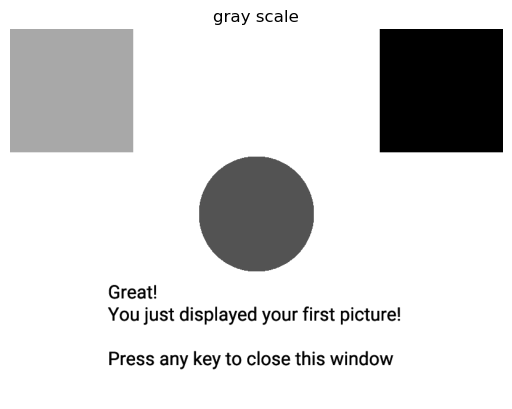

In [17]:
#img = cv2.imread("[Dataset] Module 20 images/image001.png", cv2.IMREAD_GRAYSCALE)
img_1 = cv2.imread("[Dataset] Module 20 images/image001.png", 0)
plt.imshow(img_1, cmap='gray')
plt.title('gray scale')
plt.axis('off')
plt.show()

### 작업 5: 회색조 배열의 크기를 표시합니다.

회색조 이미지 배열의 크기가 어떻게 표시 될지 예상해 보세요.

In [18]:
#your code here                      # 출력된 크기가 이전의 img.shape와 다른가요?  답변 : 색상에 대한 부분이 없습니다.
print(img_1.shape)

(600, 800)


회색조 이미지는 원래 배열의 1/3 크기이므로 메모리도 적게 사용하고, 이미지 처리도 더 빠를 것이라 예상됩니다.

### 작업 6: 이미지의 왼쪽 상단 모서리 색상을 찾습니다.

이미지의 왼쪽 상단 모서리의 색상은 무엇입니까?

In [19]:
#your code here           # 이미지의 왼쪽 상단 모서리의 색상은 무엇입니까? 배열 인덱싱은 0부터 시작합니다.  답변 : 휘도에 대한 정도 값만 나오는 것 같습니다.
                          # 원본 이미지의 결과와 무엇이 다른가요?
print(img_1[0,0]) 

200


### 작업 7: 이미지의 오른쪽 상단 모서리의 색상을 찾습니다.

이미지의 오른쪽 상단 모서리의 색상은 무엇입니까?

In [20]:
#your code here          # 이미지의 오른쪽 상단 모서리의 색상은 무엇입니까?
                           # 원본 이미지의 결과와 무엇이 다른가요?
print(img_1[0,799])

95


일부 색상은 회색조로 변환할 때 실제로 다른 색상보다 더 어둡게 나타날수 있습니까?
https://docs.opencv.org/4.0.0/de/d25/imgproc_color_conversions.html 에서 다양한 색상 공간에 대해 자세히 알아볼 수 있습니다.

색 공간은 RBG 이외에도 표현하는 방식이 많이 있습니다. 그러나 우리는 더 깊게 들어가지는 않을 것이며, 여러분이 관심이 있다면 위의 링크를 읽어보십시오. 더 많은 정보를 원하면 인터넷을 이용하여 정보를 찾아보세요.

### 2.2 임계값, 마스킹 및 관심 영역

앞서 우리는 일부 색상이 다른 색상보다 얼마나 어두운지 확인해 보았습니다. 매우 어둡거나 매우 밝은 그림의 일부 영역에만 관심이 있다면 어떨까요? 화면 오른쪽 상단에 있는 사각형만 찾아낼 수 있습니까?

**기술 1: 회색조(Greyscale) 강도**

In [21]:
# 오른쪽 상단에 있는 사각형의 픽셀 강도가 29임을 기억하십시오.
# 이제 29보다 큰 값을 가진 모든 것은 255(흰색)로 표시합니다.
# 이것은 임계값을 29로 설정하고 있음을 의미합니다.

ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

오른쪽 상단의 사각형은 검은색으로 나타나고, 이미지의 다른 부분은 흰색으로 나타납니다. 
이제 추가적인 이미지 처리를 위해 이 영역에 집중할 수 있습니다.

우리가 집중하고자 하는 영역은 일반적으로 관심 영역(ROI)이라고 이야기합니다.

### 작업 8: 텍스트, 가운데 원, 오른쪽 상자를 캡처하려면(검은색으로 표시) 어떻게 합니까?

In [22]:
ret,thresholded = cv2.threshold(grey,149,255,cv2.THRESH_BINARY)  
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                             # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

임계값 29로 계속 작업해 보겠습니다.

일반적으로 관심 영역(ROI)은 흰색으로, 다른 영역은 검은색으로 하고 싶습니다. 다음 코드를 실행해 보세요:

In [23]:
ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY_INV)    #we use cv2.THRESH_BINARY_INV instead of cv2.THRESH_BINARY
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                             # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

### 작업 9: 텍스트, 가운데 원, 오른쪽 상자가 ROI(흰색으로 표시됨)가 되도록 하려면 어떻게 해야 합니까?

In [24]:
#your code here 
ret,thresholded = cv2.threshold(grey,149,255,cv2.THRESH_BINARY_INV)    #we use cv2.THRESH_BINARY_INV instead of cv2.THRESH_BINARY
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                             # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

여러분은 위의 예제가 어디에 사용되는 것인지 궁금해 하실 수 있습니다.

관심 영역(ROI)을 임계값으로 지정하면 이를 마스크로 사용하여 원본 이미지에 표시할 수 있습니다.

### 마스크?

**그러면 마스크는 무엇입니까?**

아래 그림을 살펴봅시다.

<img src="[Dataset] Module 20 images/image001_masking.jpg" />

위의 이미지(가운데)에서 오른쪽 상단 모서리에 파란색 사각형에 대한 마스크를 볼 수 있습니다. 해당 마스크(가운데 이미지)를 원본 이미지(왼쪽 이미지)에 적용하면 마스크된 이미지(오른쪽 이미지)에 파란색 사각형만 남습니다.

마스크 레이어는 이미지에서 관심 영역을 강조 표시하는 데 도움이 됩니다. 마스크를 이미지에 적용하면 관심 있는 부분(마스크의 흰색 영역)만 유지되고 나머지 부분(검은색 영역)은 삭제됩니다.

참고: 여러분은 이 개념을 Adobe Photoshop과 같은 인기 있는 이미지 편집 소프트웨어에서도 볼 수 있는데, 이 소프트웨어에서는 "clipping masks" 기능이라고 합니다.

In [25]:
ret,thresholded = cv2.threshold(grey,29,255,cv2.THRESH_BINARY_INV)  

masked = cv2.bitwise_and(img, img, mask = thresholded) 
cv2.imshow("Masked", masked)

cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

파란색 사각형을 필터링 하였습니까?

이제 여러분이 임계값에 추가하고 싶은 것이 무엇인지 실험하고 확인해 볼 시간입니다. 

- 중앙에 있는 원만 임계값으로 지정할 수 있습니까? 
- 회색조 이미지에서는 어떻게 할 수 있을까요?

회색조 이미지는 작업하기에 가장 좋은 이미지는 아닐 것입니다. 원본 이미지가 있음을 기억하십시오.

<img src="[Dataset] Module 20 images/image001.png" alt="Drawing" style="width: 400px; border:1px solid; float:left;"/>
<div style="clear: both;"></div>

**기술 2: 색상.**<br />

이미지가 numpy 배열이라는 것을 기억하십니까? Numpy 배열은 고급 필터로 쉽게 필터링할 수 있습니다.

우리는 이미지 처리를 좀 더 쉽게 진행하기 위해 배경의 흰색을 대신 검정색으로 바꾸고 싶을 수도 있습니다.

In [26]:
mask = img.copy()                         # 우리가 만들 마스크 이미지. 초기 이미지의 복사본으로 초기화합니다.
(b,g,r) = cv2.split(img)                  # BGR 이미지를  각 채널별로 분할하여 별도로 작업할 수 있습니다.
mask[(b==255)&(g==255)&(r==255)] = 0     # 흰색 배경(BGR 채널이 모두 255인 경우)을 0(검정색)으로 변경합니다.
print(b.shape)

cv2.imshow("Mask",mask)

cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

(600, 800)


마스크의 다른 레이어가 어떻게 보이는지 살펴보겠습니다. 각각 0, 1 및 2 채널 입니다.

In [27]:
cv2.imshow("Blue Mask",mask[:,:,0])       # 단어가 어떻게 파란색인지 주목하십시오.
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

In [28]:
cv2.imshow("Green Mask",mask[:,:,1])
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

In [29]:
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                           # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

**기술 3: 위치 기반의 빠른 Numpy 배열 조작**

녹색 채널의 결과에서 단어 주변에 노이즈가 있을을 확인할 수 있습니다. 이것을 어떻게 깔끔하게 만들 수 있을까요?

In [30]:
mask[300:,:,1]=0                          # 이미지는 행렬임을 기억하십시오. 아래쪽 절반을 검은색(0)으로 만듭니다.
cv2.imshow("Green Mask",mask[:,:,1])
#cv2.imshow("Green Mask",mask)
cv2.waitKey(0)                           # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

이미지의 크기가 기억나지 않는 경우 어떤 명령을 사용하여 알 수 있습니까?

In [31]:
mask.shape

(600, 800, 3)

이제 빨간색 채널의 글자 주변의 노이즈를 확인해 봅시다.

In [32]:
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

빨간색 채널 단어 주변에도 일부 노이즈를 확인할 수 있습니다. 이것을 어떻게 깔끔하게 만들 수 있을까요?

### 작업 10: 빨간색 채널 단어 주변의 노이즈를 제거합니다.

In [33]:
mask[400:,:,2]=0                          # 이미지는 행렬임을 기억하십시오. 아래쪽 절반을 검은색(0)으로 만듭니다.
cv2.imshow("Red Mask",mask[:,:,2])
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

이제 색상을 기반으로 이미지에서 객체(원, 사각형)를 간단히 얻을 수 있습니다.

In [34]:
# 두번째 채널이 빨간색입니다. OpenCV에서 색공간은 (B,G,R)입니다.
masked = cv2.bitwise_and(img,img,mask=mask[:,:,2])
cv2.imshow("Circle",masked)                   

cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

In [35]:
# 첫번째 채널이 녹색입니다. OpenCV에서 색공간은 (B,G,R)입니다.
masked = cv2.bitwise_and(img,img,mask=mask[:,:,1])
cv2.imshow("Left Green Rectangle",masked)
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

In [36]:
# 세번째 채널이 파란색입니다. OpenCV에서 색공간은 (B,G,R)입니다.
masked = cv2.bitwise_and(img,img,mask=mask[:,:,0])
cv2.imshow("Right Blue Rectangle",masked)
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

파란색 채널의 결과 사각형뿐만 아니라 단어도 표시되는 것을 확인할 수 있습니다. 단어도 파란색이기 때문입니다!

단어가 표시되지 않도록 하려면 다음과 같이 "지울 수 있습니다".

### 작업 11: 단어를 지우세요!

In [37]:
#your code here
mask[300:,:,0]=0
masked = cv2.bitwise_and(img,img,mask=mask[:,:,0])
cv2.imshow("Blue letter",masked)

cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

우리는 마스킹, 임계값 및 관심 영역에 상당한 시간을 할애했습니다. 색상, 픽셀 강도, Numpy Array 조작(예: 이미지의 일부에 접근 및 수정 하기)에 따라 사용할 수 있는 다양한 접근 방식이 있습니다. 시간을 내어 이러한 기술을 연습하고 다른 이미지로도 실험해 보십시오.

컴퓨터 비전도 인생과 같이 동일한 목표에 도달할 수 있는 여러 가지 방법이 있습니다. 관심 영역을 얻는 더 효율적인 방법을 생각해 볼 수 있습니다.

### 2.3 기하학적 변환(크기 조정 및 자르기)

이미지가 너무 크거나 너무 작은 경우 어떻게 크기를 조정할 수 있습니까?

### 작업 12: 800x600 이미지를 400x300 이미지로 만들기

In [38]:
#your code here 
resized = cv2.resize(img,(400,300))
cv2. imshow('resized', resized)

cv2.waitKey(0)                                 # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

이제 이미지의 크기는 얼마입니까?

In [39]:
#your code here 
resized.shape

(300, 400, 3)

가로, 세로 비율이 다른 경우 크기 조정 기능을 사용하여 이미지를 확장할 수도 있습니다.

### 작업 13: 800x600 이미지를 200x300 이미지로 늘이기

In [40]:
#your code here 
resized = cv2.resize(img,(200,300))
cv2. imshow('resized', resized)

cv2.waitKey(0)                                 # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

### 자르기

### 작업 14: 이미지를 잘라서 위쪽 절반만 얻기:

In [41]:
#your code here 
cv2.imshow('cropped Top', img[:300,:,:])

cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

### Task 15: 이미지를 잘라서 오른쪽 반만 얻기

In [42]:
#your code here 
cv2.imshow('cropped right', img[:,400:,:])

cv2.waitKey(0)                             # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

관심 영역을 중심으로 이미지를 잘라볼 수 있습니다. 관심 영역(ROI)을 추출하는 또 다른 유용한 방법을 살펴보겠습니다.

### 2.4 윤곽 감지(Contour Detection)

일반적으로 임계값 마스크를 사용하여 관심 영역을 찾습니다.

**그러면 윤곽선이란 무엇입니까?**

윤곽선은 [경계를 따라 그린 곡선](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html) 으로 생각할 수 있습니다.

단순하게 흑백 마스크를 생각하면, 경계 지역에서는 색상이 급격하게 변화될 것입니다. 윤곽선은 이 경계를 따라 그려진 곡선입니다.

윤곽 감지는 기본적으로 이러한 서로 다른 그룹을 윤곽으로 찾아 값을 반환합니다.

예를 들어 아래 이미지에 흰색 영역이 몇 개 있다고 생각하십니까?

<img src="[Dataset] Module 20 images/image001_3contours.png" style="width:400px; float:left;" />
<div style="clear: both;"></div>

3개의 윤곽선이 감지되었다고 생각하셨습니까? 그러면 해당 이미지를 로드하고 윤곽선을 그려 보겠습니다.

In [43]:
greytest = cv2.imread("[Dataset] Module 20 images/image001_3contours.png",0)    # 해당 이미지 읽기
contouroutlines = np.zeros(greytest.shape,dtype="uint8")    # 감지된 윤곽을 그리기 위한 빈 캔버스 만들기

# 윤곽선을 찾아봅시다! 
# https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a
(cnts,_) = cv2.findContours(greytest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):    
    cv2.drawContours(contouroutlines, [c], -1, 255, 1)  # 각 윤곽선에 대해 윤곽 영역의 바깥선만 그립니다.
                                                        # https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc
cv2.imshow("Contour Outlines",contouroutlines)          # 결과 표시
cv2.waitKey(0)                                          # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

print("There are "+str(len(cnts))+" contours!")         # 감지된 윤곽 수를 출력합니다.

There are 3 contours!


In [44]:
greytest = cv2.imread("[Dataset] Module 20 images/image001_3contours.png",0)    # 해당 이미지 읽기
greytest_inv=cv2.bitwise_not(greytest)
cv2.imshow('greytest_inv', greytest_inv)

cv2. waitKey(0)
cv2.destroyAllWindows()

contouroutlines = np.zeros(greytest_inv.shape,dtype="uint8")    # 감지된 윤곽을 그리기 위한 빈 캔버스 만들기

# 윤곽선을 찾아봅시다! 
# https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a
(cnts,_) = cv2.findContours(greytest_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):    
    cv2.drawContours(contouroutlines, [c], -1, 255, 1)  # 각 윤곽선에 대해 윤곽 영역의 바깥선만 그립니다.
                                                        # https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc
cv2.imshow("Contour Outlines",contouroutlines)          # 결과 표시
cv2.waitKey(0)                                          # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

print("There are "+str(len(cnts))+" contours!")         # 감지된 윤곽 수를 출력합니다.

There are 1 contours!


3개의 윤곽선이 있는 간단한 예제입니다.

원본 이미지에서는 몇 개의 윤곽선이 감지될 것으로 예상하십니까?

<img src="[Dataset] Module 20 images/image001_allcontours.png" style="width:400px; float:left;" />
<div style="clear:both;"></div>


먼저 임계값을 이용하여 이미지를 만듭니다.

In [45]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 임계값을 적용합니다
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Thresholded",thresholded)

cv2.waitKey(0)                           # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

이제 이미지의 윤곽을 찾아보겠습니다. 윤곽이 몇 개나 될 것 같습니까? 이미지를 잘 살펴보세요!

In [46]:
# 윤곽선을 찾아보자!
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(img.shape,dtype="uint8")  # 감지된 윤곽을 그리기 위한 빈 캔버스 만들기
for (i, c) in enumerate(cnts):    
    cv2.drawContours(mask, [c], -1, (0,255,0), 1) 
    
cv2.imshow("Mask",mask)  
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()


print("There are "+str(len(cnts))+" contours!")

There are 78 contours!


78개의 윤곽선이 있는 이유는 무엇입니까? 그 이유는 바로 글자 때문입니다.

실제로 계산되는 것을 시각화할 수 있도록 윤곽선에 라벨을 지정해 보겠습니다.

아래에서 각 문자가 1개의 윤곽선을 형성하는 경향을 볼 수 있습니다. 그러나 "i" 문자의 경우 상단과 하단이 연결되어 있지 않기 때문에 일부 문자가 실제로 2개의 윤곽선으로 계산되고 있습니다. 느낌표도 마찬가지입니다.

아래 코드는 주석 처리된 코드가 포함되어 있어서 더 길어 보일 수 있습니다. 섹션 2.5에서 코드에 대한 내용을 더 자세하게 다루기 때문에 지금은 이 코드에 대해 걱정하지는 마십시오. 
코드를 실행하고 윤곽선이 어떻게 계산되는지 확인해 보십시오.
각 "윤곽선" 주위에 그려진 빨간색 경계 상자를 주목해 보세요.

In [47]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 임계값을 적용합니다
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Thresholded",thresholded)

# 윤곽선을 찾아보자!
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda cnts: cv2.boundingRect(cnts)[1])  # 윤곽선을 위에서 아래로 정렬합니다.

mask = cv2.merge([thresholded,thresholded,thresholded])  # 감지된 윤곽을 그리기 위한 캔버스 만들기
for (i, c) in enumerate(cnts):                           # https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html  
    #cv2.drawContours(mask, [c], -1, (255,255,255), -1) 
    (x, y, w, h) = cv2.boundingRect(c)                   # 윤곽 경계 상자의 x,y 좌표를 가져옵니다.
    cv2.rectangle(mask, (x,y), (x+w,y+h), (0,0,255))     # 경계 상자를 빨간색으로 그립니다.

    cv2.putText(mask, ""+str(i+1), (x,y+28), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0,255,0), 1)
    
cv2.imshow("Mask",mask)  
cv2.waitKey(0)                            # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()


print("There are "+str(len(cnts))+" contours!")

There are 78 contours!


윤곽선에 대해 [사이트] https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html 을 방문하여 더 자세히 알아볼 수 있습니다. 더 많은 내용들을 인터넷에서 검색해 보세요. 코드를 작성하고, 에러를 처리하고, 라이브러리에 대하여 더 많은 것을 알아보는데 매우 유용할 것입니다!

팁: 위의 예에서 우리는 cv2.RETR_EXTERNAL을 사용하여 외부 윤곽을 얻었습니다. 다른 유형의 윤곽선을 얻기 위해 지정할 수 있는 다른 옵션도 있습니다. 예를 들어, cv2.RETR_LIST는 외부 윤곽뿐만 아니라 모든 윤곽을 나태냅니다.

**윤곽선을 이미지 마스크로 사용하기**

우리는 앞 부분에서 이미지 마스크에 대하여 배웠습니다. 윤곽선을 이용하여 마스크를 만들 수도 있습니다!

drawContour 함수의 마지막 매개변수를 -1로 설정하여 윤곽선 대신 윤곽 영역을 만들어 이를 마스크로 사용할 수 있습니다!

In [48]:
(T, thresholded) = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
thresholded[410:,:]=0                     # 이미지 하단에 있는 텍스트를 제거합니다.
#cv2.imshow("Thresholded",thresholded)

# 윤곽선이 몇개인지 확인하기.
(cnts,_) = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(thresholded.shape,dtype="uint8")
for (i, c) in enumerate(cnts):    
    cv2.drawContours(mask, [c], -1, 255, -1)  # 마지막 매개변수는 윤곽선 두께를 정의합니다. -1은 윤곽선 내부를 채웁니다.
    
cv2.imshow("Mask",mask)
cv2.imshow("Masked Image",cv2.bitwise_and(img,img,mask=mask))  
cv2.waitKey(0)                             # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()


print("There are "+str(len(cnts))+" contours!")

There are 3 contours!


임계값을 이용한 마스크 이미지 생성보다, 윤곽선을 이용하여 마스크를 생성하는 것이 더 간단합니다.

### 2.5 선 그리기 및 텍스트 쓰기

drawContour를 사용하여 윤곽선을 이용한 마스크 이미지를 생성해 보았습니다. 이미지에 글자와 선을 추가하는 방법을 살펴보겠습니다. 2.4의 예를 다시 살펴보고 윤곽선에 라벨을 추가해 보겠습니다!

코드에서 변경된 3줄만 설명합니다. 
코드의 다른 줄은 2.4의 예제와 유사하며 해당 예제를 참조하여 해당 코드 줄이 수행하는 작업을 확인할 수 있습니다.

먼저 각 윤곽선에 대한 경계 상자를 가져오고 그 주위에 직사각형을 그린 다음 각 윤곽선에 라벨을 지정할 텍스트를 추가합니다.

In [49]:
greytest = cv2.imread("[Dataset] Module 20 images/image001_3contours.png",0)
contouroutlines = np.zeros(greytest.shape,dtype="uint8")

(cnts,_) = cv2.findContours(greytest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):    
    cv2.drawContours(contouroutlines, [c], -1, 255, 1)

    # 각 윤곽의 경계 상자 가져오기
    (x, y, w, h) = cv2.boundingRect(c)
    
    # 각 윤곽 주위에 직사각형 그리기 (즉, 경계 상자를 그립니다)
    cv2.rectangle(contouroutlines, (x, y), (x+w, y+h), (255,255,0), 2) 
    
    # 각 윤곽에 "COUNTOUR <>"라는 텍스트 추가
    cv2.putText(contouroutlines, "Contour "+str(i+1), (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    
cv2.imshow("Contour Outlines",contouroutlines)          
cv2.waitKey(0)                                          
cv2.destroyAllWindows()

print("There are "+str(len(cnts))+" contours!")         

There are 3 contours!


화면에 텍스트를 입력하고 사각형, 원과 같은 모양을 그리는 것에 대한 자세한 내용은 https://docs.opencv.org/4.0.0/dc/da5/tutorial_py_drawing_functions.html 을 참조하세요.

나중에 객체 감지용 응용 프로그램을 만들 경우 이 방법을 사용하여 실제로 감지한 항목에 주석을 달 수 있습니다. 
또는 코드만으로 자신만의 예술 작품과 이미지를 만들 수도 있습니다!

처음부터 무언가를 그려 봅시다.

**ACCESS DENIED**

In [50]:
# 빈 캔버스 생성(높이, 너비, 채널) - 3개의 색상 채널, 너비 400, 높이 300
canvas_accessdenied = np.zeros((600,800,3),dtype="uint8")      

# 좌표 (x=100,y=230)에 색상 (255,255,0), 선 두께가 2인  직사각형 추가
cv2.rectangle(canvas_accessdenied, (100, 230), (700, 370), (255,255,0), 2)  

# 좌표 (x=150,y=320)에 색상(100,100,255), 글꼴 크기 2, 선 두께 5인 텍스트 추가
cv2.putText(canvas_accessdenied, "ACCESS DENIED", (150,320), cv2.FONT_HERSHEY_SIMPLEX, 2, (100,100,255), 5)

cv2.imshow("Canvas Access Denied",canvas_accessdenied)  
cv2.waitKey(0)                             # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

"Access Granted" 텍스트를 그려보세요.

**ACCESS GRANTED**

In [51]:
# 빈 캔버스 생성(높이, 너비, 채널) - 3개의 색상 채널, 너비 400, 높이 300
canvas_accessgranted = np.zeros((600,800,3),dtype="uint8")      

# 좌표 (x=100,y=230)에 색상 (255,255,0), 선 두께가 2인 직사각형 추가
cv2.rectangle(canvas_accessgranted, (100, 230), (700, 370), (255,255,0), 2)  

# 좌표 (x=130,y=320)에 색상 (255,100,100), 글꼴 크기 2, 선 두께 5인 텍스트 추가
cv2.putText(canvas_accessgranted, "ACCESS GRANTED", (130,320), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

cv2.imshow("Canvas Access Granted",canvas_accessgranted)  
cv2.waitKey(0)                             # 아무 키나 누른 후 창 종료
cv2.destroyAllWindows()

### 작업 16: 2개의 상자가 있는 캔버스를 만듭니다. 첫 번째 상자에는 "ACCESS GRANTED"라고 표시되고 두 번째 상자에는 "PLEASE PROCEED"라고 표시됩니다.

In [52]:
import cv2
import numpy as np

# 빈 캔버스 생성(높이, 너비, 채널) - 3개의 색상 채널, 너비 800, 높이 600
canvas = np.zeros((600, 800, 3), dtype="uint8")

# 첫 번째 상자: "ACCESS GRANTED"
# 좌표 (x=100, y=100)에서 (x=700, y=250)까지 색상 (255, 255, 0)의 직사각형을 그림
cv2.rectangle(canvas, (100, 100), (700, 250), (255, 255, 0), 2)  # 2은 색상을 채우는 두께

# "ACCESS GRANTED" 텍스트 추가
cv2.putText(canvas, "ACCESS GRANTED", (130, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (100,100,255), 5)

# 두 번째 상자: "PLEASE PROCEED"
# 좌표 (x=100, y=350)에서 (x=700, y=500)까지 색상 (100, 255, 100)의 직사각형을 그림
cv2.rectangle(canvas, (100, 350), (700, 500), (100, 255, 100), 2)  # -1은 색상을 채우는 두께

# "PLEASE PROCEED" 텍스트 추가
cv2.putText(canvas, "PLEASE PROCEED", (130, 450), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,100,100), 5)

# 캔버스에 생성된 상자들을 표시
cv2.imshow("Canvas with Boxes", canvas)
cv2.waitKey(0)  # 아무 키나 누를 때까지 대기
cv2.destroyAllWindows()  # 창 닫기

## 축하합니다!

## 이제 여러분이 더 흥미롭운 콘텐츠를 만들어 볼 때입니다!

도전 과제를 진행하면서 도움이 필요하거나 openCv 함수의 구문을 알아야 하는 경우 <br />
https://docs.opencv.org/4.0.0/d2/d96/tutorial_py_table_of_contents_imgproc.html 에서 찾아보십시오.

해결 방안을 찾을 수 없다면 다른 사람들이 여러분을 도와줄 수도 있습니다. 인터넷을 활용하여 더 많은 정보를 알아보세요!

여러분의 질문에 대한 해결 방법을 계속해서 찾고, 세상의 많은 도전 과제에 도움을 줄 수 있는 좋은 자료를 계속 만드세요!

### 도전과제 1: 섹션 1.1b의 비디오 예제에서 비디오 크기를 800x600으로 조정하고 회색조로 표시

In [53]:
import cv2

# 카메라 열기 (첫 번째 카메라)
camera = cv2.VideoCapture(0)

while True:
    # 프레임 읽기
    ret, frame = camera.read()
    
    # 프레임 크기 조정 (800x600)
    frame_resized = cv2.resize(frame, (800, 600))
    
    # 회색조로 변환
    frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)
    
    # 프레임 표시
    cv2.imshow('webcam (Gray, Resized)', frame_gray)
    
    # 스페이스바를 누르면 루프 종료
    key = cv2.waitKey(1)
    if key == ord(' '):
        break

# 사용이 끝난 카메라 객체 해제
camera.release()

# 모든 창 닫기
cv2.destroyAllWindows()


### 도전과제 2: Python  time 라이브러리를 사용하여 웹캠 비디오 화면에 타임스탬프 추가하기

In [2]:
# 타임스탬프를 얻기 위한 샘플 코드. 필요한 경우 온라인에서 더 많은 옵션을 검색하십시오.
from datetime import datetime
print (datetime.now())

# 카메라 열기 (첫 번째 카메라)
camera = cv2.VideoCapture(0)

while True:
    # 프레임 읽기
    ret, frame = camera.read()
    
    if not ret:
        break
    
    # 현재 시간 가져오기 (타임스탬프 생성)
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # 타임스탬프 텍스트를 프레임에 추가 (위치 수정)
    cv2.putText(frame, str(current_time), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # 프레임 표시
    cv2.imshow('webcam', frame)
    
    # 스페이스바를 누르면 루프 종료
    key = cv2.waitKey(1)
    if key == ord(' '):
        break

# 사용이 끝난 카메라 객체 해제
camera.release()

# 모든 창 닫기
cv2.destroyAllWindows()


2024-05-03 16:36:18.665145


In [55]:
#your code here

### 도전과제 3: 빨간색과 녹색 마커를 사용하여 다양한 색상의 카드를 만들고, 특정 색상의 카드가 제시될 때마다 컴퓨터가 인식하도록 할 수 있습니까?

힌트: 먼저 제작한 카드의 사진을 몇 장 찍은 다음 간단한 이미지 처리를 사용하여 카드의 색상 패턴을 분석합니다. 필요한 경우 다양한 색상 공간을 탐색합니다. 이 시스템이 조명 조건의 변화에 어떻게 영향을 받는지 살펴보십시오.

In [56]:
#your code here

### 도전과제 4: 카메라 앞에 나타날 때마다 "ACCESS GRANTED"를 표시하는 응용 프로그램 만들기

여러분의 창의력을 발휘하십시오. 
유일한 규칙은 키보드 입력은 허용되지 않으며, 비디오 피드를 처리하는 카메라를 사용해야 한다는 것입니다.

추가적으로, 여러분만 접근 권한을 부여하고 다른 친구들의 접근을 불허하는 시스템을 만들어 보세요.
먼저 시스템에 접근하는 방법을 친구에게 보여주고, 친구가 시도하였을 때 3분 이내에 접근 권한을 얻지 못하면 여러분의 승리입니다!

In [1]:
import cv2

# 웹캠에서 비디오 캡처 객체 생성
camera = cv2.VideoCapture(0)

# 얼굴 인식을 위한 Haar Cascade 분류기 로드
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# 특정 사용자 얼굴을 식별하기 위한 변수 설정
target_face_id = 1  # 특정 사용자의 얼굴을 식별하기 위한 ID
target_face_detected = False  # 특정 사용자의 얼굴을 감지했는지 여부

while True:
    # 웹캠에서 프레임 읽기
    ret, frame = camera.read()

    if not ret:
        print("카메라에서 프레임을 읽는 데 문제가 발생했습니다.")
        break

    # 그레이스케일로 변환 (얼굴 인식을 위해)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # 감지된 얼굴들에 대해 반복
    for (x, y, w, h) in faces:
        # 얼굴을 표시하기 위한 사각형 그리기 (디버깅용)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # 특정 사용자의 얼굴 ID가 감지된 얼굴 ID와 일치하면
        if target_face_id in range(0, 100):  # 예시로 범위 지정 (실제 사용시에는 인식된 얼굴의 ID를 확인하여 조정)
            target_face_detected = True
        else:
            target_face_detected = False

    # 얼굴이 감지되었으면 "ACCESS GRANTED" 표시
    if target_face_detected:
        cv2.putText(frame, "ACCESS GRANTED", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        cv2.putText(frame, "REFUSE ENTRY", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # 이미지를 화면에 표시
    cv2.imshow("Access Control", frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord(' '):
        break

# 사용이 끝난 카메라 객체 해제
camera.release()

# 모든 창 닫기
cv2.destroyAllWindows()


### 도전과제 5: https://www.youtube.com/watch?v=xyfSUOfFI_E 비디오 시청 

컴퓨터 비전의 능력을 이용하여 여러분이 만들어 보고 싶은 것에 대한 아이디어를 작성해 보세요. <br />

In [58]:
#your answer here

### 도전과제 6: 현실 세계에서 본 Computer Vision 응용 프로그램의 예를 3개 이상 작성하기

In [59]:
#your answer here

### 도전과제 7: 작업 4에서 만든 시스템의 몇 가지 제한 사항 작성하기

제약 사항을 어떻게 개선할 수 있을까요?

In [60]:
#your answer here

In [71]:
# 카메라로 피아노 소리 불러오기, 실패한듯함

import cv2
import numpy as np
import winsound
from threading import Thread

class Detection:
    THRESHOLD = 1500

    def __init__(self, image):
        self.previous_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    def get_active_cell(self, image):
        current_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        delta = cv2.absdiff(self.previous_gray, current_gray)
        threshold_image = cv2.threshold(delta, 25, 255, cv2.THRESH_BINARY)[1]

        # Debug
        cv2.imshow('OpenCV Detection', image)
        cv2.waitKey(10)

        self.previous_gray = current_gray

        height, width = threshold_image.shape[:2]
        cell_width = width // 7

        cells = np.zeros(7)
        for i in range(7):
            cells[i] = cv2.countNonZero(threshold_image[0:height, i * cell_width:(i + 1) * cell_width])

        top_cell = np.argmax(cells)

        if cells[top_cell] >= self.THRESHOLD:
            return top_cell
        else:
            return None

class Webcam:
    def __init__(self):
        self.video_capture = cv2.VideoCapture(0)
        self.current_frame = self.video_capture.read()[1]
        self.detection = Detection(self.current_frame)  # Detection 객체 생성

    def start(self):
        Thread(target=self._update_frame, args=()).start()

    def _update_frame(self):
        while True:
            self.current_frame = self.video_capture.read()[1]
            self.detection.previous_gray = cv2.cvtColor(self.current_frame, cv2.COLOR_BGR2GRAY)  # 프레임 업데이트

    def get_current_frame(self):
        return self.current_frame

# Musical notes (C, D, E, F, G, A, B)
NOTES = [262, 294, 330, 350, 393, 441, 494]

webcam = Webcam()
webcam.start()

switch = False  # 스위치 변수 초기화

try:
    while True:
        image = webcam.get_current_frame()
        cell = webcam.detection.get_active_cell(image)
        if cell is None:
            continue

        # Draw a green rectangle around the active cell
        height, width = image.shape[:2]
        cell_width = width // 7
        x1 = cell * cell_width
        x2 = (cell + 1) * cell_width
        cv2.rectangle(image, (x1, 0), (x2, height), (0, 255, 0), 2)

        if switch:
            winsound.Beep(NOTES[cell], 1000)

        switch = not switch

except KeyboardInterrupt:
    # Release the webcam
    webcam.video_capture.release()
    cv2.destroyAllWindows()


Exception in thread Thread-9 (_update_frame):
Traceback (most recent call last):
  File "c:\Users\gadi2\anaconda3\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\gadi2\anaconda3\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\gadi2\AppData\Local\Temp\ipykernel_11848\1240367013.py", line 49, in _update_frame
cv2.error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

